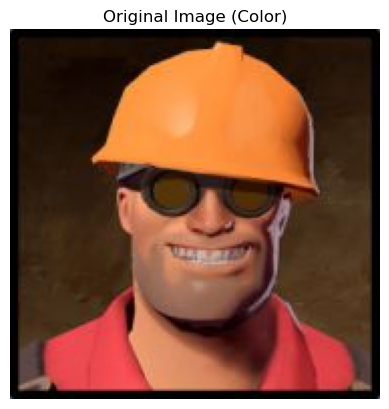

Image center: (y = 92, x = 92)
Pixel intensity at center (BGR): [ 67  92 172]
Pixel intensity at center of color patch (BGR): [168 158  50]


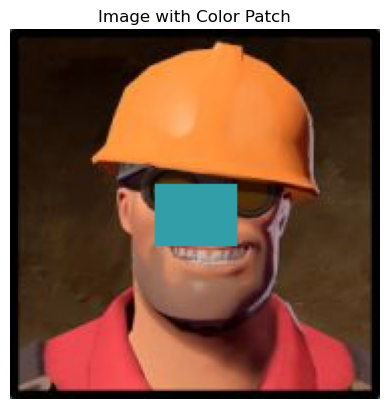

In [14]:
# Import libraries
import cv2
import matplotlib.pyplot as plt

# Step 1: Read the image in color
image = cv2.imread('tf2_engineer.jpg')  # BGR format
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display original image
plt.imshow(image_rgb)
plt.title('Original Image (Color)')
plt.axis('off')
plt.show()

# Step 2: Find center and pixel value
height, width, _ = image.shape
center_y = height // 2
center_x = width // 2
center_pixel = image[center_y, center_x]
print(f"Image center: (y = {center_y}, x = {center_x})")
print(f"Pixel intensity at center (BGR): {center_pixel}")

# Step 3: Draw rectangle patch around center
# Hex #329ea8 → BGR (168, 158, 50)
patch_color_bgr = (168, 158, 50)
rect_height = 30
rect_width = 40
top_left = (center_x - rect_width // 2, center_y - rect_height // 2)
bottom_right = (center_x + rect_width // 2, center_y + rect_height // 2)
patched_image = image.copy()
cv2.rectangle(patched_image, top_left, bottom_right, patch_color_bgr, -1)

# Step 4: Pixel value at center of patch
patch_center_pixel = patched_image[center_y, center_x]
print(f"Pixel intensity at center of color patch (BGR): {patch_center_pixel}")

# Step 5: Display final image
patched_image_rgb = cv2.cvtColor(patched_image, cv2.COLOR_BGR2RGB)
plt.imshow(patched_image_rgb)
plt.title('Image with Color Patch')
plt.axis('off')
plt.show()


## Problem 1: Color Patch on tf2_engineer.jpg


In this part, the image is read in color using OpenCV. Since OpenCV loads images in BGR format, it’s converted to RGB before displaying with Matplotlib.
The center of the image is calculated based on its dimensions, and the pixel value at that center is printed.
A colored rectangle (30x40 pixels) is drawn around the center using the color #329ea8, which is converted to BGR format.
After drawing the rectangle, we check that the pixel at the center has the new color.


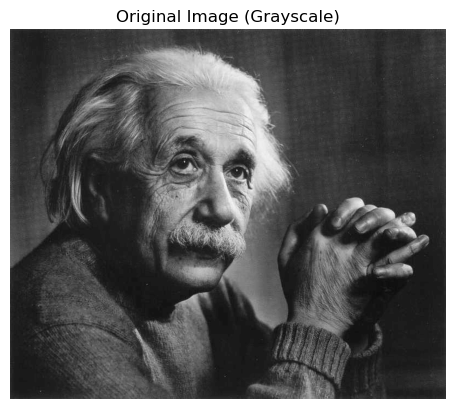

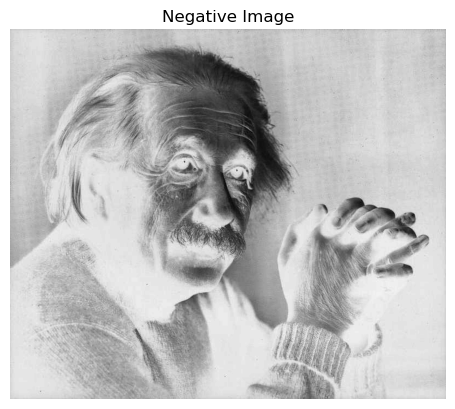

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Step 1: Read the image in grayscale
image = cv2.imread('einstein.tif', cv2.IMREAD_GRAYSCALE)

# Display original grayscale image
plt.imshow(image, cmap='gray')
plt.title('Original Image (Grayscale)')
plt.axis('off')
plt.show()

# Step 2: Get the negative image
negative_image = 255 - image

# Step 3: Display negative image
plt.imshow(negative_image, cmap='gray')
plt.title('Negative Image')
plt.axis('off')
plt.show()

# Step 4: Compare pixel values (5 random pixels)
height, width = image.shape
for i in range(5):
    x = random.randint(0, width - 1)
    y = random.randint(0, height - 1)



 Problem 2: Negative of einstein.tif
 
The grayscale image is read and shown first.
To create the negative, we subtract every pixel value from 255.
We then display the result to visually confirm the inversion.
To better understand the change, we select 5 random pixels and compare their values before and after applying the negative transformation.

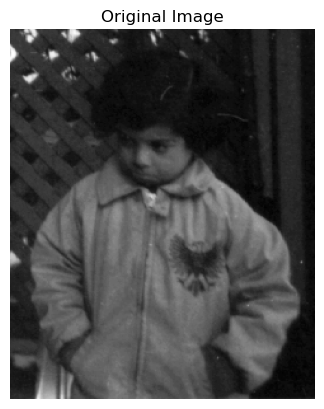

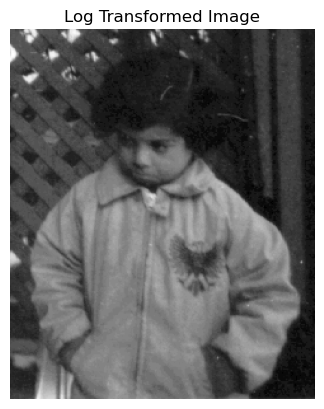

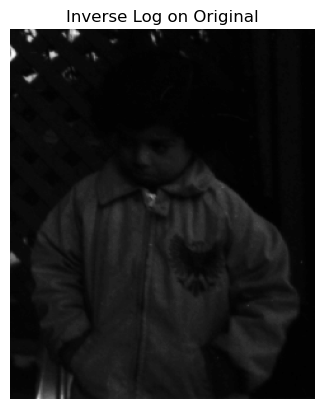

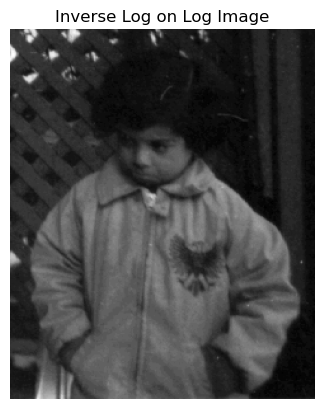

In [26]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Step 1: Read grayscale image
image = cv2.imread('pout.tif', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

# Step 2: Apply log transform
c = 255 / np.log(1 + np.max(image))
log_image = c * np.log(1 + image.astype(np.float32))
log_image = np.uint8(log_image)
plt.imshow(log_image, cmap='gray')
plt.title('Log Transformed Image')
plt.axis('off')
plt.show()

# Step 3: Apply inverse log to original
inverse_log_1 = (np.exp(image / c) - 1)
inverse_log_1 = np.uint8(np.clip(inverse_log_1, 0, 255))
plt.imshow(inverse_log_1, cmap='gray')
plt.title('Inverse Log on Original')
plt.axis('off')
plt.show()

# Step 4: Inverse log on log-transformed image
inverse_log_2 = (np.exp(log_image / c) - 1)
inverse_log_2 = np.uint8(np.clip(inverse_log_2, 0, 255))
plt.imshow(inverse_log_2, cmap='gray')
plt.title('Inverse Log on Log Image')
plt.axis('off')
plt.show()


## Problem 3: Log and Inverse Log Transform on pout.tif

the grayscale image is loaded and shown.
We apply a logarithmic transformation to boost the visibility of darker regions.
Next, we try inverse log both on the original image and on the log-transformed one.
We then compare both results to see how close they are to the original.
As expected, applying inverse log on the log-transformed image recovers the original image more accurately.


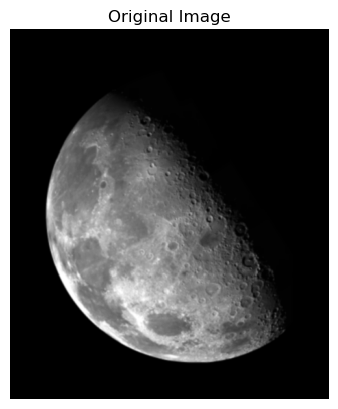

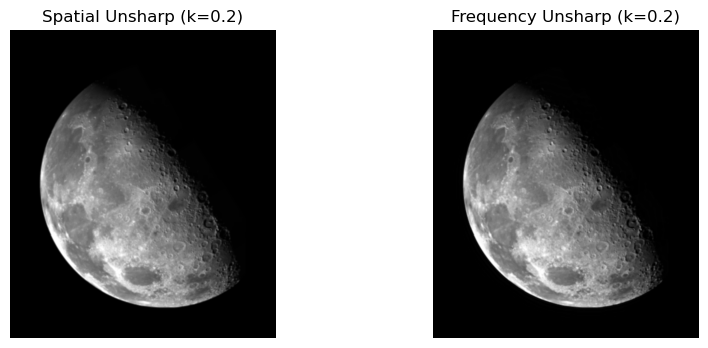

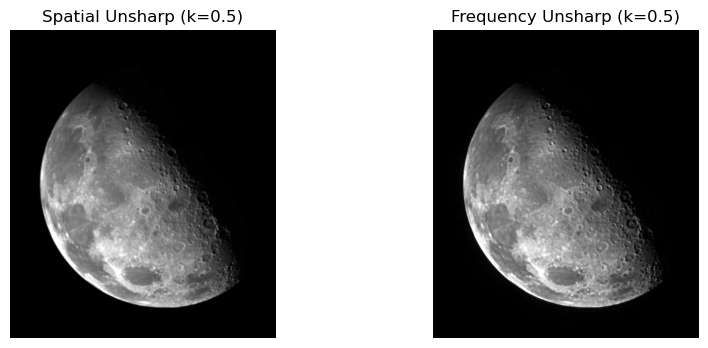

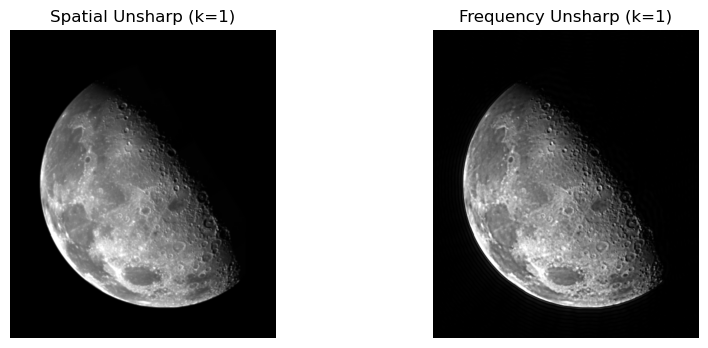

In [20]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Step 1: Read image
image = cv2.imread('moon.tif', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

# Step 2: Unsharp masking in spatial domain
def unsharp_spatial(img, k):
    blur = cv2.GaussianBlur(img, (9, 9), 0)
    mask = cv2.subtract(img, blur)
    sharp = cv2.addWeighted(img, 1.0, mask, k, 0)
    return sharp

k_values = [0.2, 0.5, 1]
spatial_results = [unsharp_spatial(image, k) for k in k_values]

# Step 3: Unsharp masking in frequency domain
def high_pass_filter(shape, D0):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    H = np.zeros((rows, cols), np.float32)
    for u in range(rows):
        for v in range(cols):
            D = np.sqrt((u - crow) ** 2 + (v - ccol) ** 2)
            H[u, v] = 1 if D > D0 else 0
    return H

def unsharp_freq(img, k, D0):
    dft = np.fft.fft2(img)
    dft_shift = np.fft.fftshift(dft)
    H = high_pass_filter(img.shape, D0)
    result = (1 + k * H) * dft_shift
    img_back = np.fft.ifft2(np.fft.ifftshift(result))
    img_back = np.abs(img_back)
    img_back = np.uint8(np.clip(img_back, 0, 255))
    return img_back

freq_results = [unsharp_freq(image, k, 40) for k in k_values]

# Step 4: Display side-by-side results
for i, k in enumerate(k_values):
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    axs[0].imshow(spatial_results[i], cmap='gray')
    axs[0].set_title(f'Spatial Unsharp (k={k})')
    axs[0].axis('off')
    axs[1].imshow(freq_results[i], cmap='gray')
    axs[1].set_title(f'Frequency Unsharp (k={k})')
    axs[1].axis('off')
    plt.show()


## Problem 4: Unsharp Masking on moon.tif

The image is read in grayscale and displayed.
First, we apply unsharp masking in the spatial domain using Gaussian blur and several values for the scaling factor k.
Then, we repeat unsharp masking in the frequency domain using a high-pass filter. We use the same k values and choose a cut-off frequency D0 = 40.
Results from both approaches are shown side by side for each k value to compare the sharpness.


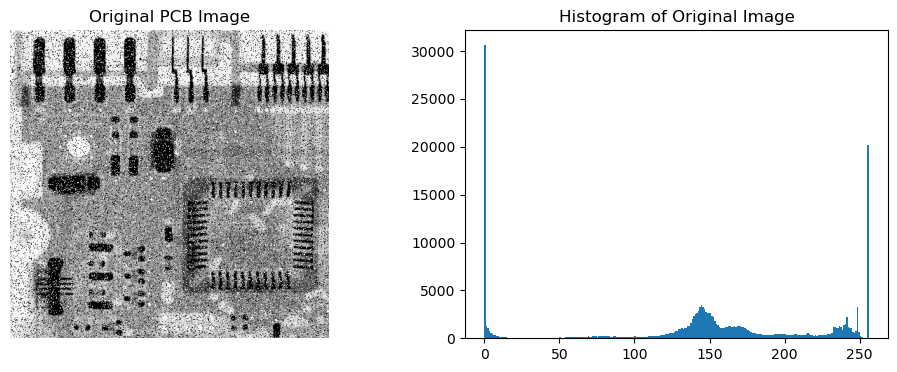

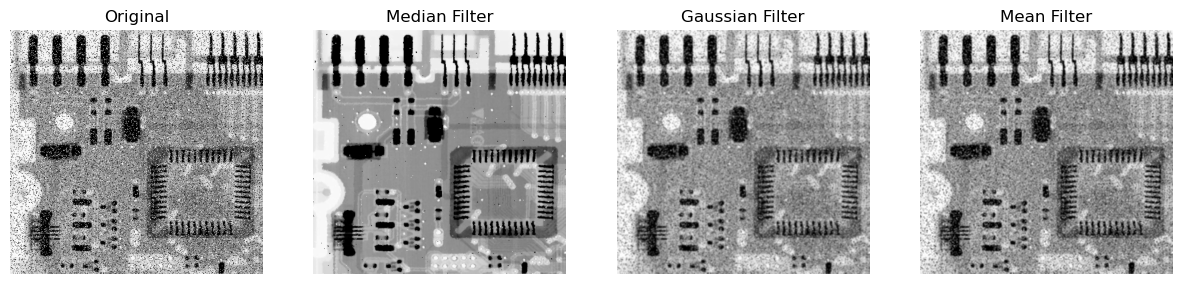

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read image
pcb = cv2.imread('pcb.tif', cv2.IMREAD_GRAYSCALE)

# Step 2: Display original + histogram
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.imshow(pcb, cmap='gray')
plt.title('Original PCB Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.hist(pcb.ravel(), bins=256, range=[0,256])
plt.title('Histogram of Original Image')
plt.show()

# Step 3: Apply filters
median_filtered = cv2.medianBlur(pcb, 3)
gaussian_filtered = cv2.GaussianBlur(pcb, (5,5), 0)
mean_filtered = cv2.blur(pcb, (3,3))

# Step 4: Display results
plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
plt.imshow(pcb, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(median_filtered, cmap='gray')
plt.title('Median Filter')
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(gaussian_filtered, cmap='gray')
plt.title('Gaussian Filter')
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(mean_filtered, cmap='gray')
plt.title('Mean Filter')
plt.axis('off')

plt.show()


## Problem 5: Noise Removal on pcb.tif

The noisy grayscale image is loaded and visualized.
Looking at the image and its histogram, the noise seems to be salt-and-pepper.
To fix this, we apply a median filter, which works well for this kind of noise.
We also try a Gaussian blur afterward to further smooth the image if needed.


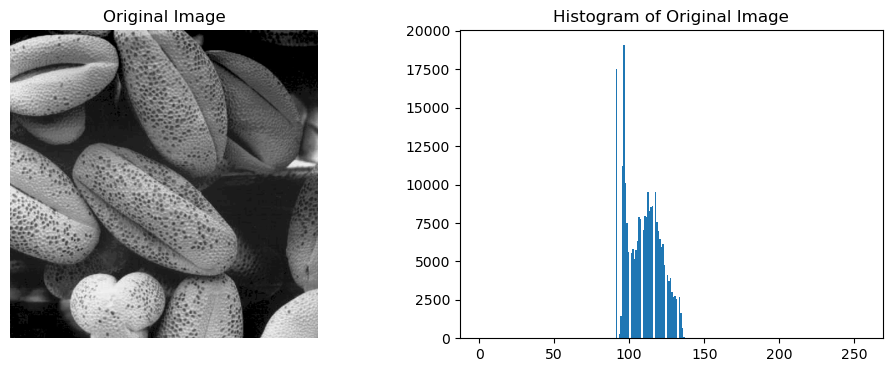

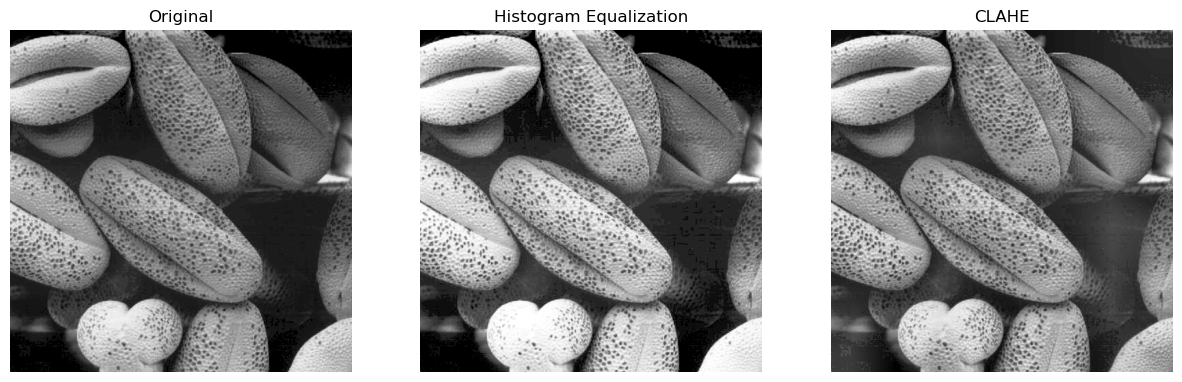

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read image
pollen = cv2.imread('pollen.tif', cv2.IMREAD_GRAYSCALE)

# Step 2: Display original + histogram
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.imshow(pollen, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.hist(pollen.ravel(), bins=256, range=[0,256])
plt.title('Histogram of Original Image')
plt.show()

# Step 3: Solution 1 – Histogram Equalization
equalized = cv2.equalizeHist(pollen)

# Step 4: Solution 2 – CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_result = clahe.apply(pollen)

# Step 5: Display all
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(pollen, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(equalized, cmap='gray')
plt.title('Histogram Equalization')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(clahe_result, cmap='gray')
plt.title('CLAHE')
plt.axis('off')

plt.show()


## Problem 6: Analysis and Enhancement of pollen.tif

After loading and displaying the image, we notice that it looks washed out.
Histogram analysis confirms the image has low contrast and limited dynamic range.
We try two solutions:

Histogram Equalization to globally stretch the contrast.

CLAHE, which improves local contrast without over-amplifying noise.
We compare both enhanced versions using their histograms and statistical measures like standard deviation.
CLAHE typically produces better, more natural-looking results.